Processing file: sub-02_task-run3_eeg.edf
File exists. Proceeding to read the file.
Plotting sub-02_task-run3_eeg


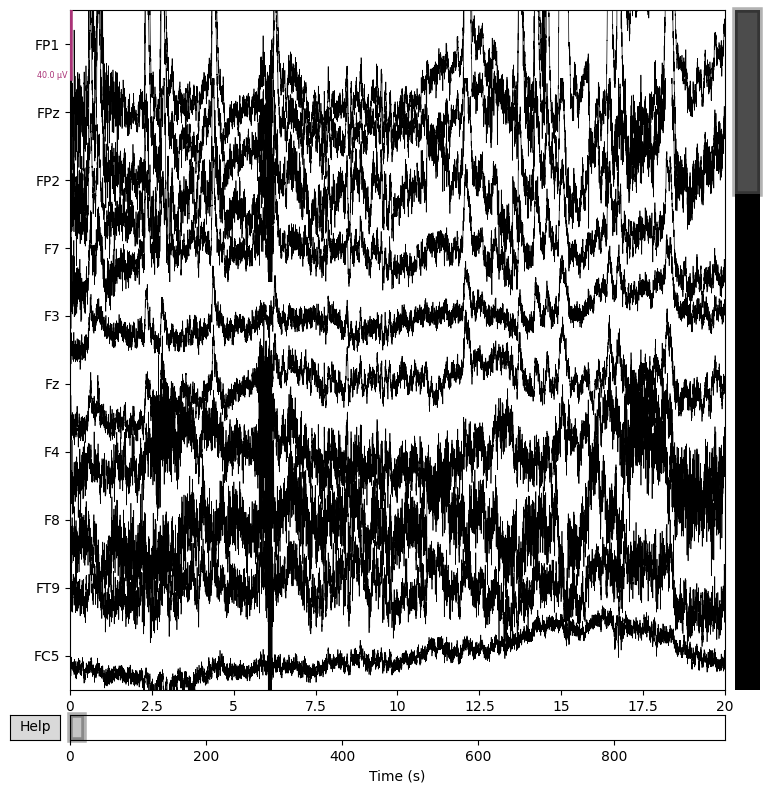

Processing file: sub-02_task-run5_eeg.edf
File exists. Proceeding to read the file.
Plotting sub-02_task-run5_eeg


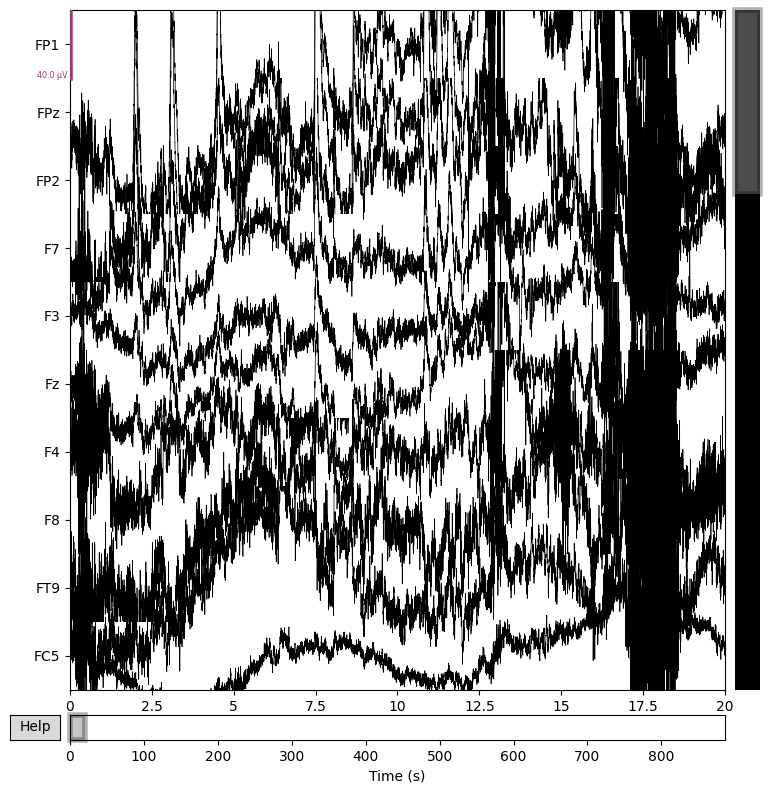

Processing file: sub-03_task-run1_eeg.edf
File exists. Proceeding to read the file.
Plotting sub-03_task-run1_eeg


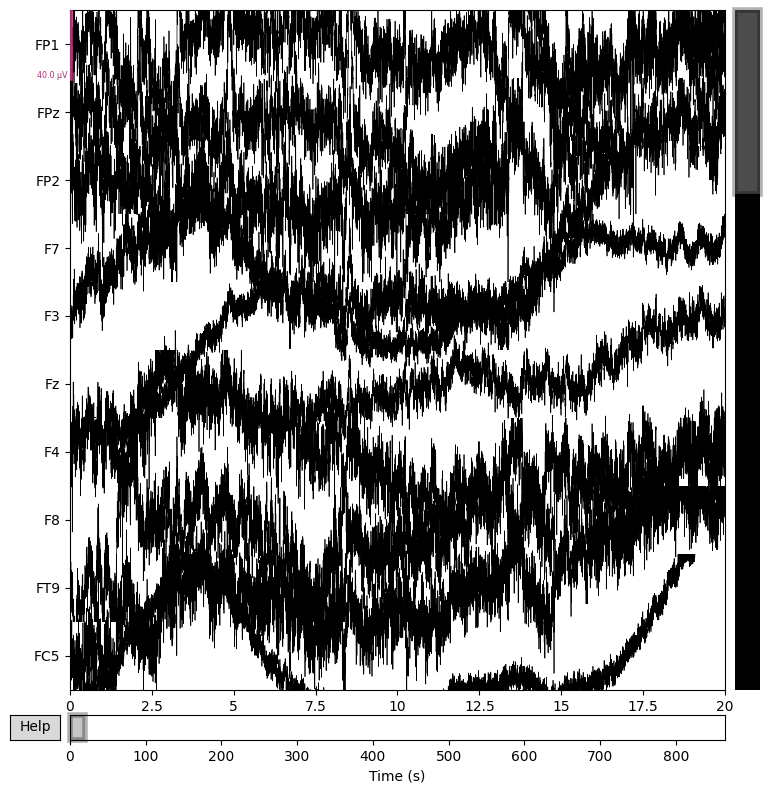

In [ ]:
"""
Best,
Sam
"""

import mne
import os
import glob
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Invalid measurement date encountered in the header.")

# Set MNE logging level to WARNING to reduce output
mne.set_log_level('WARNING')

# Define the path to the directory containing the EEG data
base_path = r"C:\Users\samue\CC_dataset\music"

# Search for all .edf files in the directory and its subdirectories
edf_files = glob.glob(os.path.join(base_path, '**', '*.edf'), recursive=True)

# Iterate through the list of .edf files
number = 0 

for edf_path in edf_files:
    # Extract the file name from the full path and remove the .edf extension
    file_name = os.path.basename(edf_path)
        
    # Print the file name
    print(f"Processing file: {file_name}")
    number += 1
    file_name = os.path.splitext(file_name)[0]

    # Check if the file exists
    if not os.path.exists(edf_path):
        print(f"Error: The specified file does not exist: {edf_path}")
    else:
        print("File exists. Proceeding to read the file.")
        # Read the .edf file
        try:
            with warnings.catch_warnings():
                warnings.filterwarnings("ignore", category=RuntimeWarning, message="Invalid measurement date encountered in the header.")
                raw = mne.io.read_raw_edf(edf_path, preload=True, stim_channel=False)
            # Print the file name before plotting
            print(f"Plotting {file_name}")
            # Plot the EEG data
            raw.plot(duration=20, n_channels=10)
        except Exception as e:
            print(f"An error occurred while reading the .edf file: {e}")
    
    # Limit to processing 5 files
    if number == 3:
        break